##Assignment 8-9: <font color='3C6E71'></font>


####Total Points: 2 points)
\


**Objective:**

Use a real-world dataset to analyze and compare Decision Trees, Random Forest, Ensemble Models (Bagging and Boosting), Dimensionality Reduction (PCA), and Clustering (k-means). This assignment aims to explore the effectiveness of these methods, understand their strengths and limitations, and identify practical use cases.

**Dataset:**

Use the "Heart Disease Dataset" from Kaggle:
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction.
This dataset contains health indicators such as age, cholesterol levels, and smoking habits, with the goal of predicting the likelihood of heart disease.


**Instructions:**

1) Dataset Preparation (0.5 points):

Download and explore the Heart Disease Dataset.

Preprocess the data:

Handle missing values (if any).

Normalize/standardize the numerical features.

Encode categorical variables.

Visualize key variables to understand relationships (e.g., age vs. cholesterol).

2) Task 1: Decision Trees and Random Forest (0.5 points):

Define a classification task, such as predicting whether a person has heart disease ("Yes" or "No").

Implement Decision Tree and Random Forest models:

Perform hyperparameter tuning for both models.

Record performance metrics such as accuracy, precision, recall, and F1-score.

Extract and visualize feature importance from both models.

Write a short analysis comparing Decision Tree and Random Forest, focusing on overfitting, interpretability, and predictive performance.

3) Task 2: Ensemble Models – Bagging and Boosting (0.5 points):

Implement Bagging and Boosting methods using:

Bagging: BaggingClassifier (e.g., with Decision Trees).

Boosting: AdaBoost or Gradient Boosting.

Evaluate and compare the performance of these models against Random Forest.

Discuss how Bagging and Boosting handle bias-variance trade-offs.

4) Task 3: Dimensionality Reduction and Clustering (0.5 points):

Dimensionality Reduction:

Apply PCA to the dataset and retain components that explain 90% of the variance.

Visualize the dataset in 2D using the top two principal components.

Clustering:

Perform k-means clustering on the dataset (or PCA-reduced data).

Determine the optimal number of clusters using the elbow method or
silhouette analysis.

Compare the clusters to the actual heart disease labels and evaluate clustering performance using metrics like purity or Adjusted Rand Index.

**Grading (2 Points Total):**

Dataset Preparation and Visualization (0.5 points):

Thorough preprocessing and meaningful visualizations of relationships between features.

Implementation and Results (1 point):

Accurate implementation of all models and dimensionality reduction techniques.

Clear evaluation of results with metrics and visualizations.

Analysis and Comparison (0.5 points):

Insightful comparison of methods, highlighting trade-offs and practical recommendations.


In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('C:\\Users\\Acer\\Downloads\\heart.csv')

In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [30]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df[numerical_columns].head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432


In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['ChestPainType'] = label_encoder.fit_transform(df['ChestPainType'])
df['RestingECG'] = label_encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = label_encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = label_encoder.fit_transform(df['ST_Slope'])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,-0.551341,1,1.382928,0,-0.832432,2,0
1,-0.478484,0,2,1.491752,-0.171961,-0.551341,1,0.754157,0,0.105664,1,1
2,-1.751359,1,1,-0.129513,0.770188,-0.551341,2,-1.525138,0,-0.832432,2,0
3,-0.584556,0,0,0.302825,0.139040,-0.551341,1,-1.132156,1,0.574711,1,1
4,0.051881,1,2,0.951331,-0.034755,-0.551341,1,-0.581981,0,-0.832432,2,0


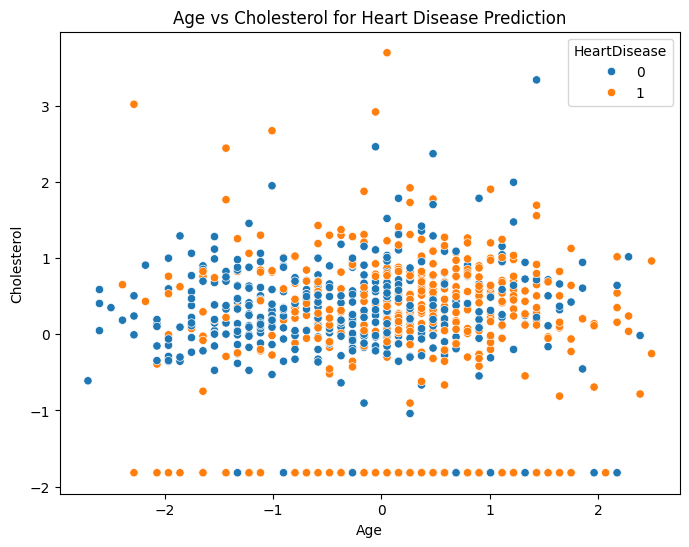

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Cholesterol', data=df, hue='HeartDisease')
plt.title('Age vs Cholesterol for Heart Disease Prediction')
plt.show()

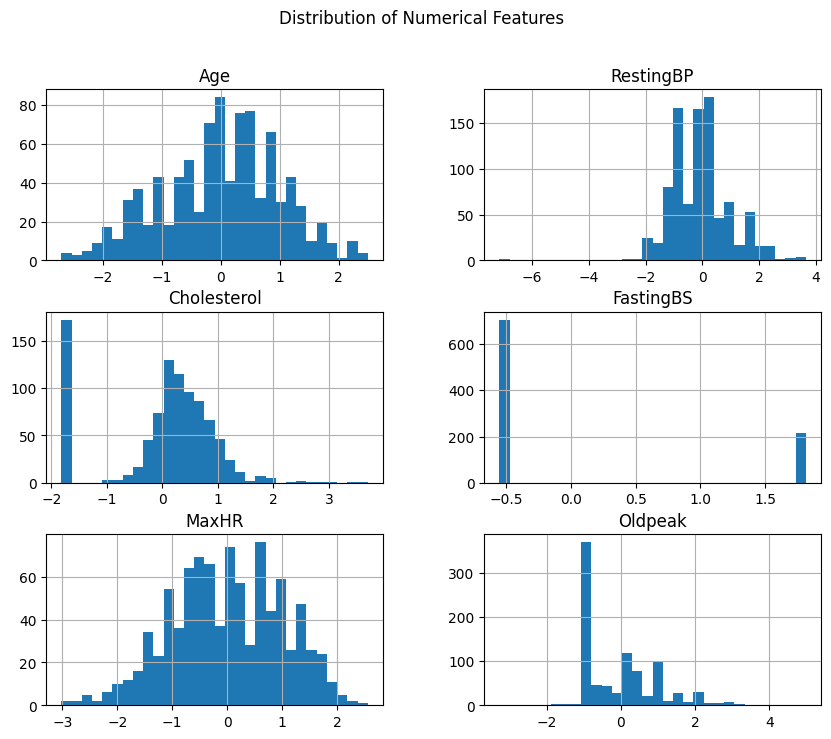

In [16]:
# Plot histograms for numerical features
df[numerical_columns].hist(figsize=(10, 8), bins=30)
plt.suptitle('Distribution of Numerical Features')
plt.show()

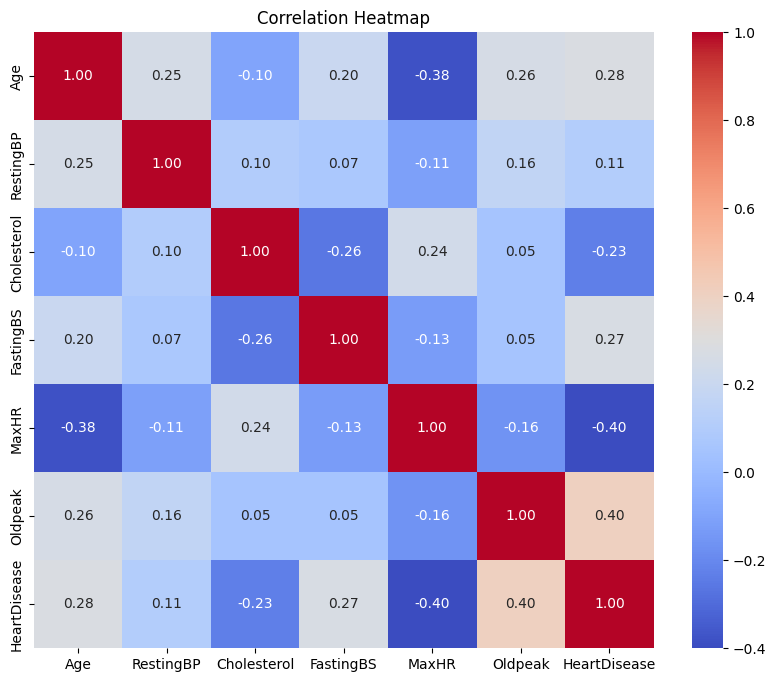

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_columns + ['HeartDisease']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

2. Implement Decision Tree and Random Forest Models


In [35]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(734, 11) (184, 11)


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree:", grid_search_dt.best_params_)

best_dt = grid_search_dt.best_estimator_
best_dt.fit(X_train, y_train)

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, random_state=42)

In [38]:
# Random Forest Model
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)

best_rf = grid_search_rf.best_estimator_
best_rf.fit(X_train, y_train)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [39]:
# Predict with Decision Tree
y_pred_dt = best_dt.predict(X_test)

# Predict with Random Forest
y_pred_rf = best_rf.predict(X_test)

In [40]:
# Calculate performance metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Calculate performance metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [41]:
print("Decision Tree - Accuracy:", accuracy_dt, "Precision:", precision_dt, "Recall:", recall_dt, "F1-Score:", f1_dt)
print("Random Forest - Accuracy:", accuracy_rf, "Precision:", precision_rf, "Recall:", recall_rf, "F1-Score:", f1_rf)

Decision Tree - Accuracy: 0.8043478260869565 Precision: 0.8901098901098901 Recall: 0.7570093457943925 F1-Score: 0.8181818181818182
Random Forest - Accuracy: 0.8804347826086957 Precision: 0.897196261682243 Recall: 0.897196261682243 F1-Score: 0.897196261682243


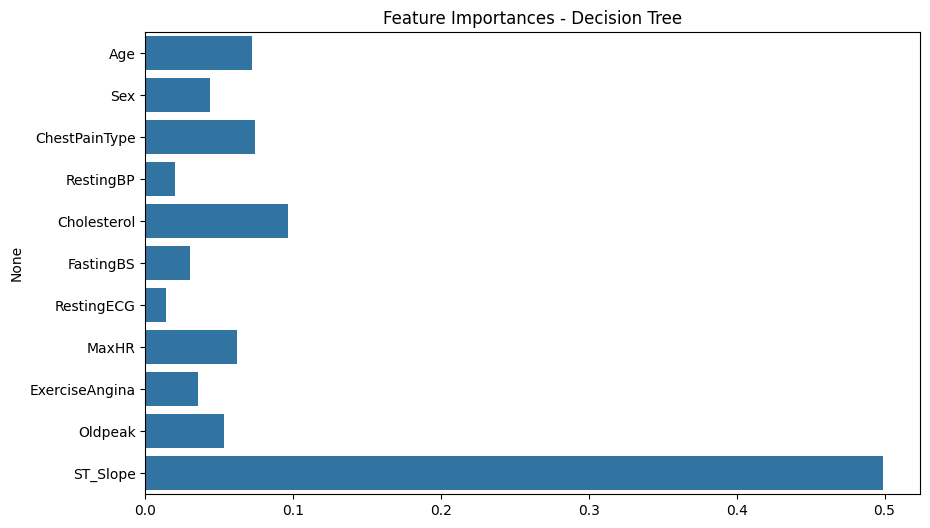

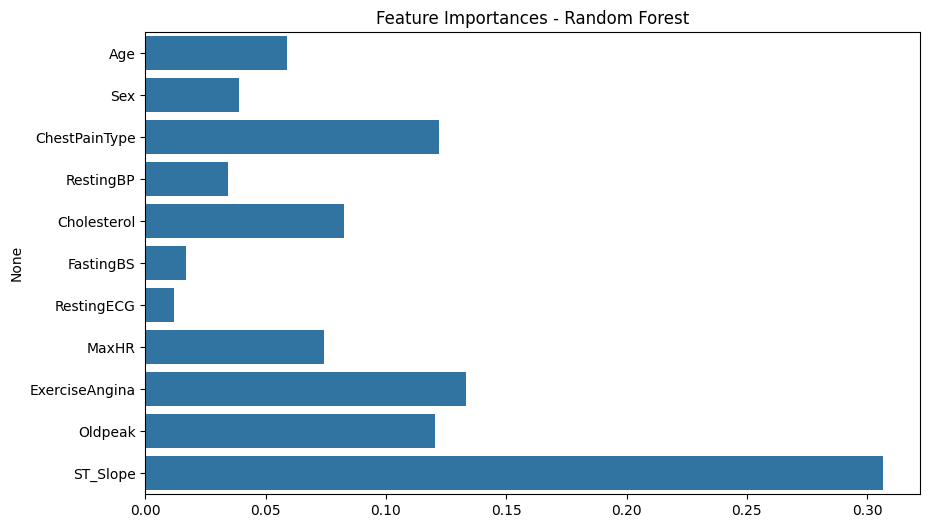

In [42]:
# Plot for Decision Tree
plt.figure(figsize=(10, 6))
sns.barplot(x=best_dt.feature_importances_, y=X.columns)
plt.title("Feature Importances - Decision Tree")
plt.show()

# Plot for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=best_rf.feature_importances_, y=X.columns)
plt.title("Feature Importances - Random Forest")
plt.show()

Task 3: Dimensionality Reduction and Clustering (0.5 points)

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_train)

In [44]:
print("Explained variance ratio for each component:", pca.explained_variance_ratio_)
print("Total variance explained by selected components:", sum(pca.explained_variance_ratio_))

Explained variance ratio for each component: [0.26606431 0.16067822 0.12625111 0.10282577 0.09321124 0.08118214
 0.06160994 0.04404741]
Total variance explained by selected components: 0.9358701462972875


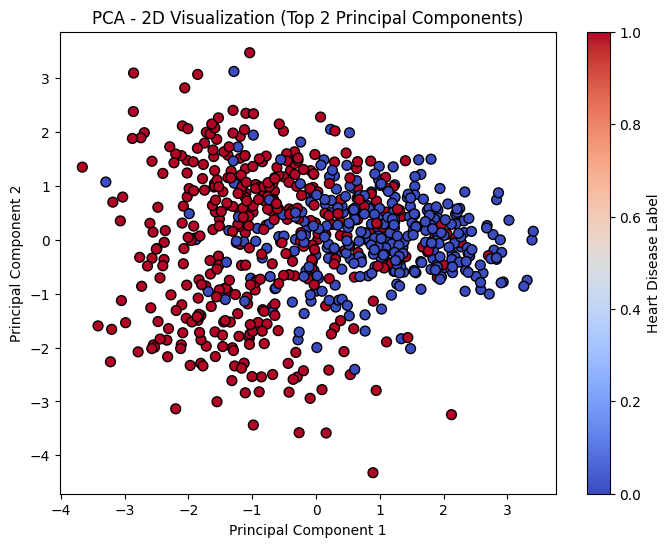

In [45]:
# Visualize the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', s=50)
plt.title('PCA - 2D Visualization (Top 2 Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Heart Disease Label')
plt.show()

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Determine the range of clusters to check
range_n_clusters = list(range(2, 11))

# Elbow method: Calculate inertia (sum of squared distances of samples to their closest cluster center)
inertia = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Silhouette analysis: Calculate the silhouette scores for each n_clusters
silhouette_scores = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_pca)
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(score)

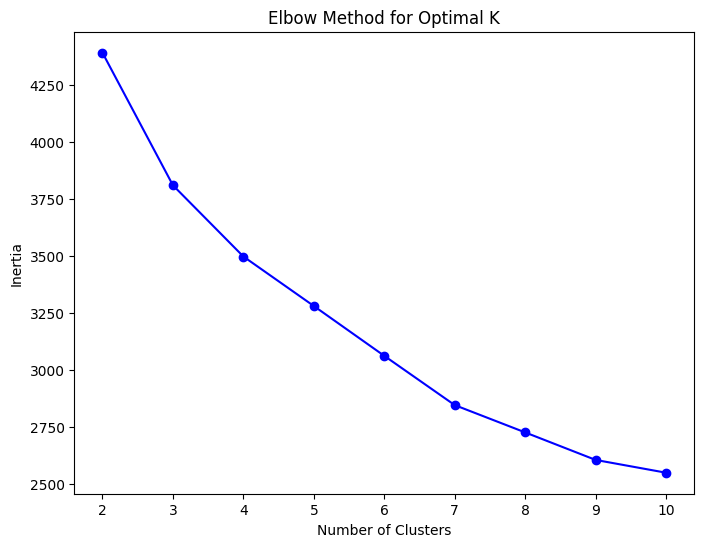

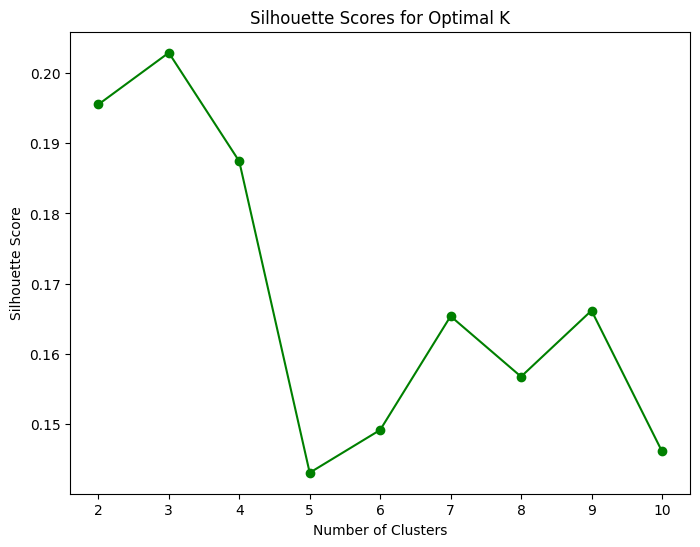

In [46]:
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='-', color='g')
plt.title('Silhouette Scores for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [48]:
from sklearn.metrics import adjusted_rand_score
import numpy as np

optimal_clusters = 2

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_pca)

cluster_labels = kmeans.labels_

ari = adjusted_rand_score(y_train, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari}")

Adjusted Rand Index (ARI): 0.3584777958868162
